In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values
myData = (df - df.min()) / (df.max() - df.min())

X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy()    # strength
X2 = myData.iloc[:, 1:2].to_numpy()    # temperature
Y = myData.iloc[:, -1:].to_numpy()       # pressure

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [5]:
#setting parameters of the model

maxDeg = 9
iter_value = 5000
iter_value += 1
skip_num = 500
learningRate = 0.05

iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((maxDeg+1, maxDeg+1, maxDeg+1))
error_array = np.zeros((maxDeg+1, iter_scaled))

In [6]:
def GD(deg, X1, X2, Y, learning_rate, iterations):
    
    wMatrix = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            wMatrix[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        dataP_errorList = []

        for z in range(len(Y)):               # for each row in input data
            row1 = X1[z]                             # contains strength
            row2 = X2[z]                            # contains temperature
            column = Y[z]                         # contains pressure
            dataP_error = 0                     # variable for calculating error in each input feature
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dataP_error += wMatrix[m][n]*(row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dataP_error -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            dataP_errorList.append(dataP_error)
            sumItrError +=  (dataP_error**2)*0.5              
    
        sumItrError = (sumItrError/len(Y))**0.5
        
        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(Y)):
                    row1 = X1[z]              # contains strength
                    row2 = X2[z]             # contains temperature
                    subSum += dataP_errorList[z] * (row1**m) * (row2**n)
                wMatrix[m][n] -= (learning_rate/len(Y))  * subSum

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
            print("Error of ", itr ," iteration of degree ", deg, " :  " ,sumItrError)
            
        if(itr == iterations - 1): 
            print("\nError of end of iteration of degree ", deg, " is:  " ,sumItrError)   
            
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = wMatrix[m][n]
    return sumItrError

Error of  0  iteration of degree  0  :   [1.95659181]
Error of  500  iteration of degree  0  :   [0.24284021]
Error of  1000  iteration of degree  0  :   [0.24284021]
Error of  1500  iteration of degree  0  :   [0.24284021]
Error of  2000  iteration of degree  0  :   [0.24284021]
Error of  2500  iteration of degree  0  :   [0.24284021]
Error of  3000  iteration of degree  0  :   [0.24284021]
Error of  3500  iteration of degree  0  :   [0.24284021]
Error of  4000  iteration of degree  0  :   [0.24284021]
Error of  4500  iteration of degree  0  :   [0.24284021]
Error of  5000  iteration of degree  0  :   [0.24284021]

Error of end of iteration of degree  0  is:   [0.24284021]


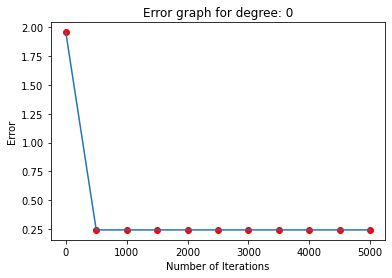

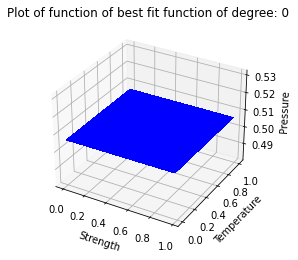


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  1  :   [0.55098132]
Error of  500  iteration of degree  1  :   [0.15532792]
Error of  1000  iteration of degree  1  :   [0.13157129]
Error of  1500  iteration of degree  1  :   [0.11962748]
Error of  2000  iteration of degree  1  :   [0.11396523]
Error of  2500  iteration of degree  1  :   [0.11137766]
Error of  3000  iteration of degree  1  :   [0.11021764]
Error of  3500  iteration of degree  1  :   [0.10970235]
Error of  4000  iteration of degree  1  :   [0.10947442]
Error of  4500  iteration of degree  1  :   [0.10937379]
Error of  5000  iteration of degree  1  :   [0.10932939]

Error of end of iteration of degree  1  is:   [0.10932939]


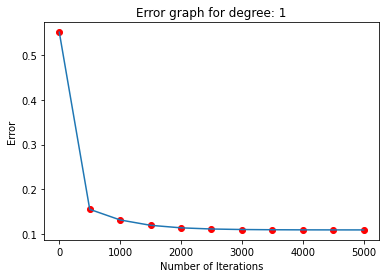

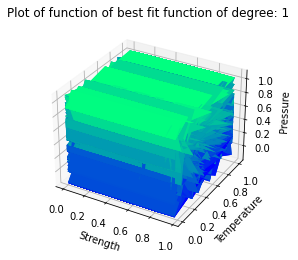


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  2  :   [0.41536265]
Error of  500  iteration of degree  2  :   [0.13318917]
Error of  1000  iteration of degree  2  :   [0.1202247]
Error of  1500  iteration of degree  2  :   [0.11729424]
Error of  2000  iteration of degree  2  :   [0.11630669]
Error of  2500  iteration of degree  2  :   [0.11571573]
Error of  3000  iteration of degree  2  :   [0.11523771]
Error of  3500  iteration of degree  2  :   [0.11481611]
Error of  4000  iteration of degree  2  :   [0.11443588]
Error of  4500  iteration of degree  2  :   [0.11409042]
Error of  5000  iteration of degree  2  :   [0.1137754]

Error of end of iteration of degree  2  is:   [0.1137754]


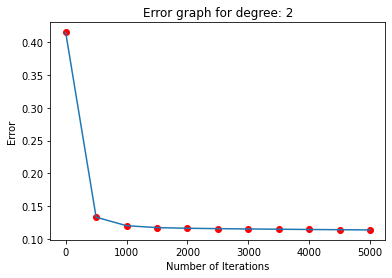

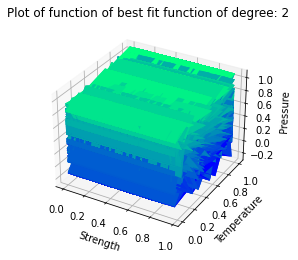


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  3  :   [0.45417459]
Error of  500  iteration of degree  3  :   [0.15426144]
Error of  1000  iteration of degree  3  :   [0.14279366]
Error of  1500  iteration of degree  3  :   [0.13639944]
Error of  2000  iteration of degree  3  :   [0.13143258]
Error of  2500  iteration of degree  3  :   [0.12738649]
Error of  3000  iteration of degree  3  :   [0.12406613]
Error of  3500  iteration of degree  3  :   [0.1213419]
Error of  4000  iteration of degree  3  :   [0.11911154]
Error of  4500  iteration of degree  3  :   [0.11729001]
Error of  5000  iteration of degree  3  :   [0.1158057]

Error of end of iteration of degree  3  is:   [0.1158057]


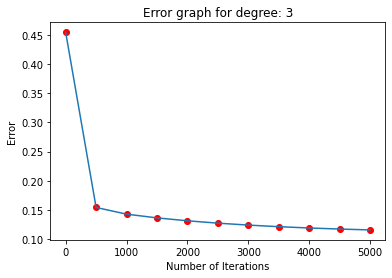

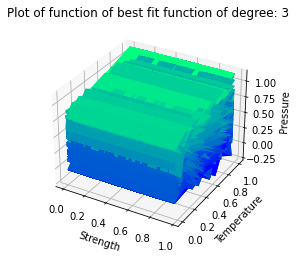


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  4  :   [0.84055005]
Error of  500  iteration of degree  4  :   [0.1926987]
Error of  1000  iteration of degree  4  :   [0.16806279]
Error of  1500  iteration of degree  4  :   [0.15196861]
Error of  2000  iteration of degree  4  :   [0.14009025]
Error of  2500  iteration of degree  4  :   [0.13124594]
Error of  3000  iteration of degree  4  :   [0.12473184]
Error of  3500  iteration of degree  4  :   [0.11999334]
Error of  4000  iteration of degree  4  :   [0.11658326]
Error of  4500  iteration of degree  4  :   [0.11414998]
Error of  5000  iteration of degree  4  :   [0.11242471]

Error of end of iteration of degree  4  is:   [0.11242471]


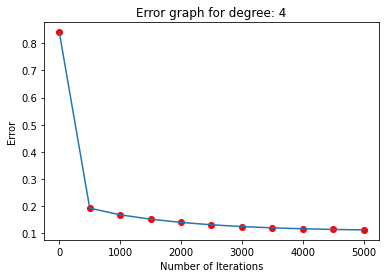

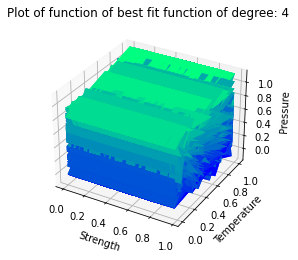


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  5  :   [0.75858302]
Error of  500  iteration of degree  5  :   [0.19098859]
Error of  1000  iteration of degree  5  :   [0.16521969]
Error of  1500  iteration of degree  5  :   [0.14763928]
Error of  2000  iteration of degree  5  :   [0.13583717]
Error of  2500  iteration of degree  5  :   [0.12807959]
Error of  3000  iteration of degree  5  :   [0.12304627]
Error of  3500  iteration of degree  5  :   [0.11979043]
Error of  4000  iteration of degree  5  :   [0.11766805]
Error of  4500  iteration of degree  5  :   [0.11625821]
Error of  5000  iteration of degree  5  :   [0.11529329]

Error of end of iteration of degree  5  is:   [0.11529329]


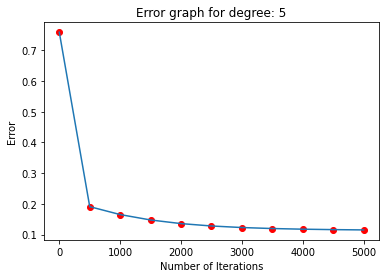

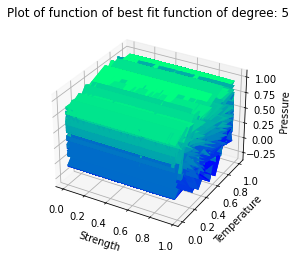


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  6  :   [1.19698683]
Error of  500  iteration of degree  6  :   [0.14078066]
Error of  1000  iteration of degree  6  :   [0.12859364]
Error of  1500  iteration of degree  6  :   [0.12176509]
Error of  2000  iteration of degree  6  :   [0.11785672]
Error of  2500  iteration of degree  6  :   [0.11559441]
Error of  3000  iteration of degree  6  :   [0.11424468]
Error of  3500  iteration of degree  6  :   [0.11339971]
Error of  4000  iteration of degree  6  :   [0.11283713]
Error of  4500  iteration of degree  6  :   [0.11243645]
Error of  5000  iteration of degree  6  :   [0.11213218]

Error of end of iteration of degree  6  is:   [0.11213218]


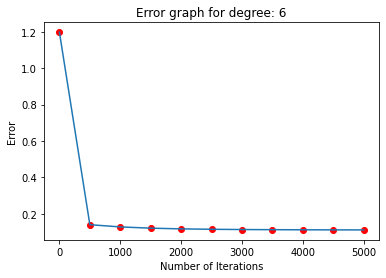

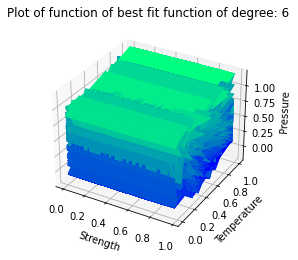


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  7  :   [1.30949268]
Error of  500  iteration of degree  7  :   [0.16967461]
Error of  1000  iteration of degree  7  :   [0.1469235]
Error of  1500  iteration of degree  7  :   [0.13434819]
Error of  2000  iteration of degree  7  :   [0.12735556]
Error of  2500  iteration of degree  7  :   [0.12330886]
Error of  3000  iteration of degree  7  :   [0.12080296]
Error of  3500  iteration of degree  7  :   [0.1191211]
Error of  4000  iteration of degree  7  :   [0.11790147]
Error of  4500  iteration of degree  7  :   [0.11695863]
Error of  5000  iteration of degree  7  :   [0.11619414]

Error of end of iteration of degree  7  is:   [0.11619414]


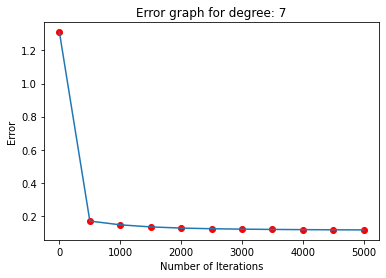

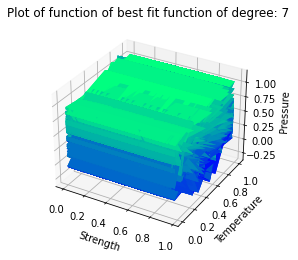


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  8  :   [0.40235817]
Error of  500  iteration of degree  8  :   [0.19097122]
Error of  1000  iteration of degree  8  :   [0.15794255]
Error of  1500  iteration of degree  8  :   [0.14176301]
Error of  2000  iteration of degree  8  :   [0.13366628]
Error of  2500  iteration of degree  8  :   [0.12919482]
Error of  3000  iteration of degree  8  :   [0.12633007]
Error of  3500  iteration of degree  8  :   [0.12421556]
Error of  4000  iteration of degree  8  :   [0.12249473]
Error of  4500  iteration of degree  8  :   [0.1210165]
Error of  5000  iteration of degree  8  :   [0.11971293]

Error of end of iteration of degree  8  is:   [0.11971293]


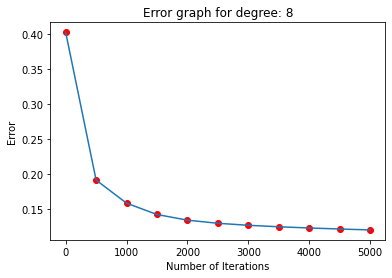

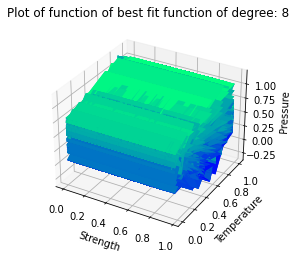


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  9  :   [1.48813324]
Error of  500  iteration of degree  9  :   [0.14666492]
Error of  1000  iteration of degree  9  :   [0.12957297]
Error of  1500  iteration of degree  9  :   [0.1227376]
Error of  2000  iteration of degree  9  :   [0.11983473]
Error of  2500  iteration of degree  9  :   [0.11839183]
Error of  3000  iteration of degree  9  :   [0.11751136]
Error of  3500  iteration of degree  9  :   [0.11687298]
Error of  4000  iteration of degree  9  :   [0.11635918]
Error of  4500  iteration of degree  9  :   [0.1159234]
Error of  5000  iteration of degree  9  :   [0.11554453]

Error of end of iteration of degree  9  is:   [0.11554453]


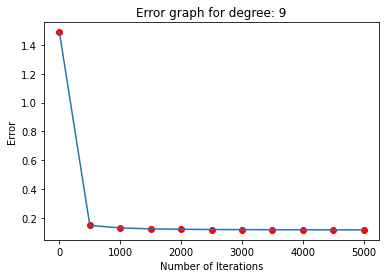

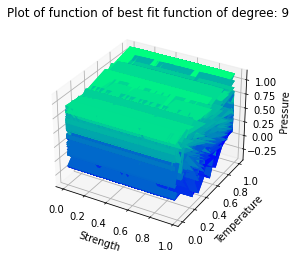


---------------------------------------------------------------------------------------------------------------------



Degree  1  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)

for i in range(maxDeg+1):
    GD_Error = GD(i, train_X1, train_X2, train_Y, 0.1 , iter_value)
    if(GD_Error <= minError):
        minError = GD_Error
        minErrorDeg = i

    error_list = error_array[i].tolist()
    
    plt.plot(x_axis, error_list)
    plt.scatter(x_axis, error_list, marker='o', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    
    
    x = test_X1
    y = test_X2
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((495,495))
    for m in range(i+1):                    # power of x1
        for n in range(i+1-m):            # power of x2
            Z += coeff_list[i][m][n]*(x**m) * (y**n)

            
    # Plotting of Surface Plots
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter', edgecolor='none')

    ax.set_xlabel('Strength')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Pressure')
    title = "Plot of function of best fit function of degree: " + str(i)
    ax.set_title(title)
    plt.show()
    
    print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
print("\nDegree ", minErrorDeg, " gives minimum error.")      

In [8]:
def Error(deg, X1, X2, Y):
    
    totalTestingError = 0
    for z in range(len(Y)):   # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]
        testingError = 0
            
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list[deg][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
        totalTestingError +=  ((testingError**2)*0.5)/len(Y)  
        
    print("Testing error of degree ", deg, " is: " ,totalTestingError)
            
    return totalTestingError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(maxDeg+1):
    SGD_Error = Error(i, test_X1, test_X2, test_Y)    
    if(SGD_Error < minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("\nDegree ", minErrorDeg, " gives minimum error. \nTesting error = ", minError) 


Testing errors for various degrees are as follows:
Testing error of degree  0  is:  [0.05691116]
Testing error of degree  1  is:  [0.01103717]
Testing error of degree  2  is:  [0.01170735]
Testing error of degree  3  is:  [0.01224628]
Testing error of degree  4  is:  [0.01158716]
Testing error of degree  5  is:  [0.01248441]
Testing error of degree  6  is:  [0.01173171]
Testing error of degree  7  is:  [0.0126837]
Testing error of degree  8  is:  [0.01388772]
Testing error of degree  9  is:  [0.01256958]

Degree  1  gives minimum error. 
Testing error =  [0.01103717]
